In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
import seaborn as sns

In [6]:
def set_sci_theme():
    style_rc = {}
    contents_rc = {}
    sns.set_theme(context="paper", style="ticks", palette="tab10", font='Times New Roman', font_scale=1)
    sns.set_style(rc=style_rc)
    sns.set_context(rc=contents_rc)
    # 查看设置
    s = sns.axes_style()
    print(s)
    c = sns.plotting_context()
    print(c)


set_sci_theme()

{'axes.facecolor': 'white', 'axes.edgecolor': '.15', 'axes.grid': False, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': '.8', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.round: 'round'>, 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['Times New Roman'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}
{'font.size': 9.600000000000001, 'axes.labelsize': 9.600000000000001, 'axes.titlesize': 9.600000000000001, 'xtick.labelsize': 8.8, 'ytick.labelsize': 8.8, 'legend.fontsize': 8.8, 'legend.title_fontsize': 9.600000000000001, 'axes.li

## 功能/主题本体父子节点相似度分布图


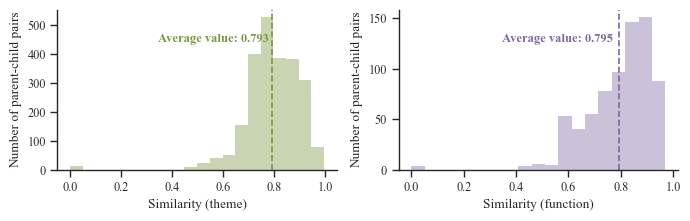

In [4]:
def plot_hist(data, column, color, dim, ax):
    # 绘制直方图
    sns.histplot(data=data, x=column, ax=ax,
                 # kde=True, 
                 binwidth=0.05,
                 color=color, element="step", linewidth=0, alpha=0.4
                 )
    # 计算平均值
    mean_value = data[column].mean()
    # 添加平均值的竖线
    ax.axvline(mean_value, color=color, linestyle='--', label=f'Average: {mean_value:.2f}')
    # 在竖线旁边注释
    ax.annotate(f'Average value: {mean_value:.3f}',
                xy=(mean_value, ax.get_ylim()[1] * 0.8),  # 注释位置
                xytext=(mean_value - 0.45, ax.get_ylim()[1] * 0.8),  # 注释文本位置
                fontsize=9, color=color, weight='bold')
    # 设置标签
    ax.set_xlabel(f'Similarity ({dim})')
    ax.set_ylabel('Number of parent-child pairs')
    # 去掉顶部和右侧的坐标轴
    sns.despine()


input_path = r'C:\Users\Administrator\Desktop\赵安琪论文图修改\赵安琪论文图修改\图-1012\数据及中间结果\相似度平均值图'
func_sim_data = pd.read_csv(os.path.join(input_path, 'direct_ancestors_function_similarity.csv'))
theme_sim_data = pd.read_csv(os.path.join(input_path, 'direct_ancestors_theme_similarity.csv'))

fig, axs = plt.subplots(1, 2, figsize=(7, 2.3))

plot_hist(theme_sim_data, 'similarity', '#799540', 'theme', axs[0])
plot_hist(func_sim_data, 'similarity3', '#7F659F', 'function', axs[1])

plt.tight_layout()

plt.savefig(os.path.join(input_path, 'direct_ancestors_similarity.svg'))

## 不同模型的对比实验结果图
主题识别、功能识别、关系提取

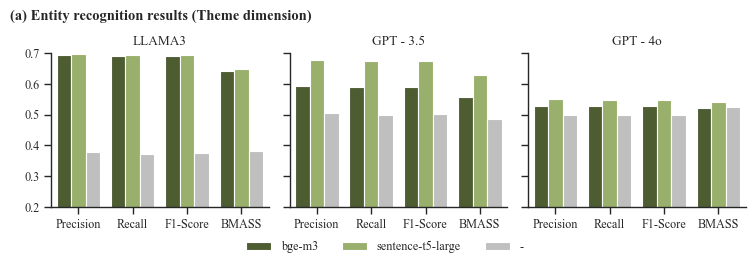

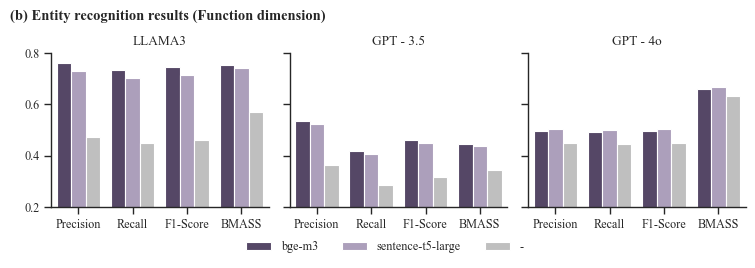

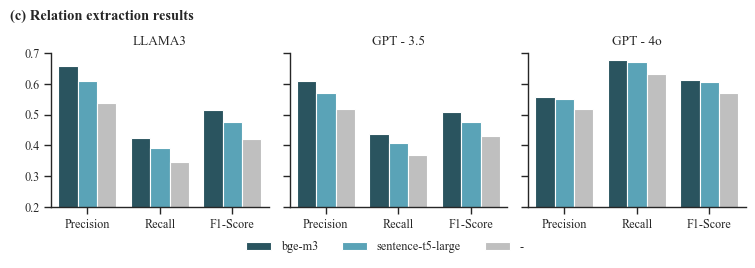

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os


# 两个函数差不多一样，唯一的区别时relation的bar图不包括Bmass，所以直接复制修改了代码
def plot_bar_entity(data, title, palettes):
    # 将数据转换为长格式
    data = data.fillna('-')
    data_long = data.melt(id_vars=["LLM", "SLM"], value_vars=["Precision", "Recall", "F1-Score", "BMASS"],
                          var_name="Metric", value_name="Value")

    # 获取唯一的 LLM
    llms = data_long['LLM'].unique()

    # 创建子图
    n_llms = len(llms)
    fig, axes = plt.subplots(nrows=1, ncols=n_llms, figsize=(2.5 * n_llms, 2.4), sharey=True)

    for ax, llm, palette in zip(axes, llms, palettes):
        subset = data_long[data_long['LLM'] == llm]

        # 绘制柱状图
        bars = sns.barplot(data=subset, x='Metric', y='Value', hue='SLM', ax=ax,
                           order=["Precision", "Recall", "F1-Score", "BMASS"],
                           palette=palette)

        if 'Theme' in title:
            yl = 0.7
        elif 'Function' in title:
            yl = 0.8
        ax.set_ylim(0.2, yl)

        # 设置标题和坐标轴
        ax.set_title(llm)
        ax.set_xlabel('')
        ax.set_ylabel('')

        # 移除默认图例
        ax.legend_.remove()
        
        
        # # 使用 ax.bar_label() 标注每个柱子的数值，设置大小和颜色
        # i = 0
        # for container in ax.containers:
        # 
        #     # Format the labels to two decimal places and omit the leading zero
        #     labels = [f"{val:.3f}".lstrip('0') for val in container.datavalues]
        #     ax.bar_label(container, labels=labels, fontsize=7, 
        #                  # color=palette[i], 
        #                  color='black',
        #                  padding=1
        #                  )  # Adjust padding as needed
        #     i += 1

    # 添加整体标题
    plt.suptitle(title, fontsize=10.5, x=0, ha='left', weight='bold')

    # 添加图例并设置位置
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels,
               # title='SLM', 
               # bbox_to_anchor=(1, 0.5), loc='center left', 
               bbox_to_anchor=(0.5, -0.08), loc='lower center',
               frameon=False,
               ncol=3)

    # 调整布局
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)  # 如果需要调整标题和图形间距
    plt.savefig(os.path.join(input_path, title + '_no_text.svg'), transparent=True, bbox_inches='tight')


def plot_bar_relation(data, title, palettes):
    # 将数据转换为长格式
    data = data.fillna('-')
    data_long = data.melt(id_vars=["LLM", "SLM"], value_vars=["Precision", "Recall", "F1-Score"],
                          var_name="Metric", value_name="Value")

    # 获取唯一的 LLM
    llms = data_long['LLM'].unique()

    # 创建子图
    n_llms = len(llms)
    fig, axes = plt.subplots(nrows=1, ncols=n_llms, figsize=(2.5 * n_llms, 2.4), sharey=True)

    for ax, llm, palette in zip(axes, llms, palettes):
        subset = data_long[data_long['LLM'] == llm]

        # 绘制柱状图
        bars = sns.barplot(data=subset, x='Metric', y='Value', hue='SLM', ax=ax,
                           order=["Precision", "Recall", "F1-Score"],
                           palette=palette)
        # ax.bar_label(ax.containers[0], fontsize=9)

        ax.set_ylim(0.2, 0.7)

        # 设置标题和坐标轴
        ax.set_title(llm)
        ax.set_xlabel('')
        ax.set_ylabel('')

        # 移除默认图例
        ax.legend_.remove()
        
               # 使用 ax.bar_label() 标注每个柱子的数值，设置大小和颜色
        # i = 0
        # for container in ax.containers:
        #     # Format the labels to two decimal places and omit the leading zero
        #     labels = [f"{val:.3f}".lstrip('0') for val in container.datavalues]
        #     ax.bar_label(container, labels=labels, fontsize=7, 
        #                  # color=palette[i], 
        #                  color='black',
        #                  padding=1
        #                  )  # Adjust padding as needed
        #     i += 1

    # 添加整体标题
    plt.suptitle(title, fontsize=10.5, x=0, ha='left', weight='bold')

    # 添加图例并设置位置
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels,
               # title='SLM', 
               # bbox_to_anchor=(1, 0.5), loc='center left', 
               bbox_to_anchor=(0.5, -0.08), loc='lower center',
               frameon=False,
               ncol=3)

    # 调整布局
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)  # 如果需要调整标题和图形间距
    plt.savefig(os.path.join(input_path, title + '_no_text.svg'), transparent=True, bbox_inches='tight')

input_path = r'C:\Users\Administrator\Desktop\赵安琪论文图修改\赵安琪论文图修改\图-1012\数据及中间结果'
# 定义颜色调色板
palettes1 = [['#50632B', '#9DBB61', '#BFBFBF']] * 3
theme_result_data = pd.read_csv(os.path.join(input_path, 'theme_result - yh.csv'))
plot_bar_entity(theme_result_data, '(a) Entity recognition results (Theme dimension)', palettes1)

# function_result
# 定义颜色调色板
palettes2 = [['#54426B', '#AB9AC0', '#BFBFBF']] * 3  # 可以根据需要添加更多调色板
func_result_data = pd.read_csv(os.path.join(input_path, 'function_result - yh.csv'))
plot_bar_entity(func_result_data, '(b) Entity recognition results (Function dimension)', palettes2)

# relation_result
# 定义颜色调色板
palettes3 = [['#215968', '#4BACC6', '#BFBFBF']] * 3  # 可以根据需要添加更多调色板
relt_result_data = pd.read_csv(os.path.join(input_path, 'relation_result - yh.csv'))
plot_bar_relation(relt_result_data, '(c) Relation extraction results', palettes3)


## Parameter Sensitivity Analysis
不同similarity阈值的实验结果对比图

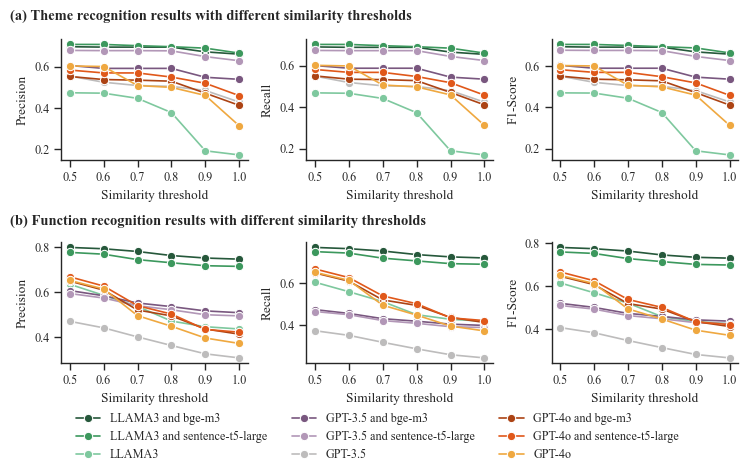

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def plot_line(data_theme, data_func, title_theme, title_func):
    # 格式化数据
    data_theme['Similarity threshold'] = data_theme['Parameter'].str[-3:]
    data_theme['Model'] = data_theme['Model'].str.replace('+', ' and ')
    
    data_func['Similarity threshold'] = data_func['Parameter'].str[-3:]
    data_func['Model'] = data_func['Model'].str.replace('+', ' and ')
    
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(2.5 * 3, 3.8))
    
    # 绘制theme的图
    for row, entity in enumerate(['theme', 'func']):
        if entity == 'theme':
            data = data_theme
            title = title_theme
        elif entity == 'func':
            data = data_func
            title = title_func
            
        for index, metric in enumerate(['Precision', 'Recall', 'F1-Score']):
            ax = axs[row, index]
            sns.lineplot(data=data, x='Similarity threshold', y=metric, hue='Model', ax=ax,
                         markers=True,  # Enable markers
                         marker='o',    # Specify marker style
                         markersize=6,  # Set marker size
                         hue_order=['LLAMA3 and bge-m3',
                                    'LLAMA3 and sentence-t5-large',
                                    'LLAMA3',
                                    'GPT-3.5 and bge-m3',
                                    'GPT-3.5 and sentence-t5-large',
                                    'GPT-3.5',
                                    'GPT-4o and bge-m3',
                                    'GPT-4o and sentence-t5-large',
                                    'GPT-4o'],
                         palette=['#26583B', '#3C985D', '#7EC89E',
                                  '#79577F', '#B297B7', '#BDBCBC',
                                  '#AC4314', '#E0581A', '#EFA840'])
    
            # 设置标题和坐标轴
            ax.set_title('')
            ax.set_xlabel('Similarity threshold')
            ax.set_ylabel(metric)

            # 移除默认图例
            ax.legend_.remove()
    
    # 添加整体标题
    fig.text(0.01, 1.05, title_theme, ha='left', fontsize=10.5, weight='bold')
    fig.text(0.01, 0.51, title_func, ha='left', fontsize=10.5, weight='bold')

    # 添加图例并设置位置
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels,
               bbox_to_anchor=(0.5, -0.14), loc='lower center',
               frameon=False,
               ncol=3)

    # 调整布局，增加行间距
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=1, hspace=0.67)  # Adjust hspace for more space between rows
    plt.savefig(os.path.join(input_path, 'Parameter Sensitivity Analysis.svg'), transparent=True, bbox_inches='tight')

input_path = r'C:\Users\Administrator\Desktop\赵安琪论文图修改\赵安琪论文图修改\图-1012\数据及中间结果\不同similarity阈值结果对比图'
theme_params_data = pd.read_csv(os.path.join(input_path, 'theme - yh.csv'))
func_params_data = pd.read_csv(os.path.join(input_path, 'function - yh.csv'))
plot_line(theme_params_data, func_params_data,
          '(a) Theme recognition results with different similarity thresholds',
          '(b) Function recognition results with different similarity thresholds')
